<a href="https://colab.research.google.com/github/davidpedem/davidpedem/blob/main/pe%C3%B1a_demiguel_david.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea Final
##David Peña de Miguel Máster PNL e IA Universidad de la Rioja
##Parte 1: Automatic Keyword extraction
##Parte 2: Modelado de temas

Para la siguiente tarea elegí la Opción 1 del documento de Tarea Final

Mi objetivo: analizar la relación entre los textos elegidos y estudiar las palabras más frecuentes, identificación de temas dentro de cada texto, grupos de temas. Mi elección fueron textos de Wikipedia sobre los libros: "El Hobbit" de JRR Tolkien, los libros de "Las cronicas de Narnia" de C.S. Lewis y "1984" de George Orwell.
Me parecía interesante el análisis para ver los temas que más destacaban en las obras, vida de autores y otros aspectos relacionados y si coincidían con mis suposiciones iniciales o incluso si coincidian entre ellos.

Procedimiento:
Extracción automática de términos utilizando todos los enfoques vistos en clase. Modelado de temas utilizando todos los enfoques vistos en clase, eligiendo el número óptimo de temas mediante el método del codo o la suma de las desviaciones cuadráticas.


Antes de empezar necesitaba un dataset con el que trabajar por lo que estuve mirando en los enlaces propuestos como [Metatext](https://metatext.io/datasets-list/corpora-task). Sin embargo, ninguno de los que encontraba me funcionaban, por ello, opté por intentar descargarme libros en formato txt desde [Proyecto Gutenberg](https://www.gutenberg.org/), pero tampoco me iban bien.
Finalmente pensé que podía descargarme los textos desde la página de la Wikipedia instalando la biblioteca de Wikipedia y guardando los txt procedentes de las url seleccionadas en mi carpeta de Drive elegida para el proyecto, y eso hice.

In [ ]:
pip install wikipedia-api ##instalo la biblioteca de wikipedia

Importo la biblioteca y drive

In [ ]:
import wikipediaapi
from google.colab import drive

# Google Drive
drive.mount('/content/drive')

def obtener_texto_wikipedia_desde_url(url):
    # Extraigo el título del artículo de la URL
    title = url.split("/")[-1]
    # Elimino los guiones bajos para convertirlos en espacios
    title = title.replace("_", " ")

    wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI,
        user_agent='my-application/1.0')

    page = wiki.page(title)

    if not page.exists():
        return "La página no existe."

    return page.text

# Añado las urls de las páginas que quiero utilizar
urls_paginas = [
    "https://en.wikipedia.org/wiki/The_Hobbit",
    "https://en.wikipedia.org/wiki/The_Chronicles_of_Narnia",
    "https://en.wikipedia.org/wiki/Nineteen_Eighty-Four"
]

for url_pagina in urls_paginas:
    texto_wikipedia = obtener_texto_wikipedia_desde_url(url_pagina)

    # Esta es la ruta donde se guardará el archivo en mi Google Drive
    ruta_en_drive = f'/content/drive/MyDrive/Master_NLP_Extracción y clasificación textual/tarea_final/{url_pagina.split("/")[-1]}.txt'

    # Guardo el texto en un archivo de texto en mi Google Drive
    with open(ruta_en_drive, 'w') as archivo:
        archivo.write(texto_wikipedia)

    # Imprimir confirmación (para ver que ha ido todo bien)
    print(f"El texto de {url_pagina} se ha guardado en tu Google Drive.")


Mounted at /content/drive
El texto de https://en.wikipedia.org/wiki/The_Hobbit se ha guardado en tu Google Drive.
El texto de https://en.wikipedia.org/wiki/The_Chronicles_of_Narnia se ha guardado en tu Google Drive.
El texto de https://en.wikipedia.org/wiki/Nineteen_Eighty-Four se ha guardado en tu Google Drive.


##Parte 1
##Enfoque lingüístico

Primero me parece oportuno recordar los pasos necesarios en la extracción automática de términos (desde el enfoque lingüístico).

 1. Tokenización: Separar el texto en unidades léxicas individuales, como típicamente palabras/tokens.

  2. Lematización: Obtener los lemmas de los tokens.

  3. Etiquetado de categorías gramaticales: Utilizar un etiquetador morfosintáctico para asignar etiquetas gramaticales a cada token, como sustantivos, verbos, etc. Esto puede ser realizado usando una librería como NLTK o SpaCy.

  4. Aplicar patrones morfosintácticos: Utilizar reglas basadas en patrones morfosintácticos para seleccionar tokens relevantes para el dominio. Por ejemplo, podría seleccionar solo los sustantivos y verbos.

  5. Aplicar una lista de exclusión: Eliminar palabras funcionales y genéricas, como artículos, preposiciones, conjunciones, verbos auxiliares, etc., utilizando una lista de palabras comunes a excluir.

  5. Calcular las frecuencias: Calcular las frecuencias de los tokens seleccionados para obtener los términos más relevantes para el dominio.

In [ ]:
import nltk ##importamos las librerías nltk y spacy para poder realizar, entre otras cosas el Paso 3 (etiquetado de categorías gramaticales)
from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
# Cargamos el modelo de spaCy para el idioma inglés
nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])

def extract_terms(text): #Función necearia para realizar la extracción automática de términos
    doc = nlp(text) #Este es el documento procesado por spacy
    # Para obtener las raíces de las palabras y las etiquetas gramaticales utilizamos:
    lemmas_tags = [(token.lemma_, token.pos_) for token in doc] #Obtenemos los lemas mediante una lista de comprensión
    # Para filtrar solo los nombres, verbos, adjetivos y adverbios
    filtered_lemmas_tags = [(lemma, tag) for lemma, tag in lemmas_tags if tag in ["NOUN", "VERB", "ADJ", "ADV"]]
    filtered_lemmas = [lemma for lemma, tag in filtered_lemmas_tags]
    # Aplicamos una lista de exclusión: para eliminar y limpiar nuestros textos de aquellas palabras que son muy frecuentes pero no son relevantes
    stop_words = set(stopwords.words("english"))
    terms = [lemma for lemma in filtered_lemmas if lemma not in stop_words]
    # Calculamos las frecuencias (términos más relevantes: que aparezcan con más frecuencia en el texto)
    freq_dist = nltk.FreqDist(terms)

    return freq_dist.most_common(10) ##Le pedimos que solo nos devuelva 10 (aunque podríamos pedirle más o menos)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Cargamos los textos (Las páginas de Wikipedia de El Hobbit, Las Cronicas de Narnia y 1984)

In [ ]:
from google.colab import drive #importamos los archivos .txt desde el drive

drive.mount('/content/drive')
text_wikipedia_hobbit_file = '/content/drive/MyDrive/Master_NLP_Extracción y clasificación textual/tarea_final/texto_wikipedia_hobbit.txt'
text_wikipedia_narnia_file = '/content/drive/MyDrive/Master_NLP_Extracción y clasificación textual/tarea_final/texto_wikipedia_narnia.txt'
text_wikipedia_1984_file = '/content/drive/MyDrive/Master_NLP_Extracción y clasificación textual/tarea_final/text_wikipedia_1984.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
text_wikipedia_hobbit, text_wikipedia_narnia, text_wikipedia_1984 = '', '', '' #Definimos tres cadenas de variables

with open(text_wikipedia_hobbit_file) as f:           #Cargamos los archivos para completar las cadenas
  text_wikipedia_hobbit = f.readline()
with open(text_wikipedia_narnia_file) as f:
  text_wikipedia_narnia = f.readline()
with open(text_wikipedia_1984_file) as f:
  text_wikipedia_1984 = f.readline()


In [ ]:
text_wikipedia_hobbit #Así se ve el texto del Hobbit (no entero)

"The Hobbit, or There and Back Again is a children's fantasy novel by English author J. R. R. Tolkien. It was published in 1937 to wide critical acclaim, being nominated for the Carnegie Medal and awarded a prize from the New York Herald Tribune for best juvenile fiction. The book is recognized as a classic in children's literature and is one of the best-selling books of all time, with over 100 million copies sold.\n"

In [ ]:
text_wikipedia_narnia

"The Chronicles of Narnia is a series of seven portal fantasy novels by British author C. S. Lewis. Illustrated by Pauline Baynes and originally published between 1950 and 1956, The Chronicles of Narnia has been adapted for radio, television, the stage, film, and video games. The series is set in the fictional realm of Narnia, a fantasy world of magic, mythical beasts and talking animals. It narrates the adventures of various children who play central roles in the unfolding history of the Narnian world. Except in The Horse and His Boy, the protagonists are all children from the real world who are magically transported to Narnia, where they are sometimes called upon by the lion Aslan to protect Narnia from evil. The books span the entire history of Narnia, from its creation in The Magician's Nephew to its eventual destruction in The Last Battle.\n"

In [ ]:
text_wikipedia_1984

"Nineteen Eighty-Four (also published as 1984) is a dystopian novel and cautionary tale by English writer George Orwell. It was published on 8 June 1949 by Secker & Warburg as Orwell's ninth and final book completed in his lifetime. Thematically, it centres on the consequences of totalitarianism, mass surveillance and repressive regimentation of people and behaviours within society. Orwell, a democratic socialist, modelled the authoritarian state in the novel on the Soviet Union in the era of Stalinism, and Nazi Germany. More broadly, the novel examines the role of truth and facts within societies and the ways in which they can be manipulated.\n"

In [ ]:
extracted_terms = extract_terms(text_wikipedia_narnia) #Aplicamos la función extracted_terms para obtener como output de los 10 términos más frecuentes
extracted_terms #Observamos que 'world" es el término con mayor frecuencia en el texto de Las Cronicas de Narnia.

[('world', 3),
 ('series', 2),
 ('fantasy', 2),
 ('child', 2),
 ('history', 2),
 ('portal', 1),
 ('novel', 1),
 ('british', 1),
 ('author', 1),
 ('illustrate', 1)]

In [ ]:
extracted_terms = extract_terms(text_wikipedia_hobbit) #Aplicamos la función extracted_terms para obtener como output de los 10 términos más frecuentes
extracted_terms #Observamos que 'child' (seguido de 'book' y 'sell') es el término con mayor frecuencia en el texto de el Hobbit

[('child', 2),
 ('book', 2),
 ('sell', 2),
 ('fantasy', 1),
 ('novel', 1),
 ('author', 1),
 ('publish', 1),
 ('wide', 1),
 ('critical', 1),
 ('acclaim', 1)]

In [ ]:
extracted_terms = extract_terms(text_wikipedia_1984) #Aplicamos la función extracted_terms para obtener como output de los 10 términos más frecuentes
extracted_terms #Observamos que 'novel' es el término con mayor frecuencia en el texto de 1984

[('novel', 3),
 ('publish', 2),
 ('society', 2),
 ('also', 1),
 ('dystopian', 1),
 ('cautionary', 1),
 ('tale', 1),
 ('english', 1),
 ('writer', 1),
 ('ninth', 1)]

##Enfoque estadístico

A continuación procedemos con el enfoque estadístico para obtener las palabras más importantes de un texto.

Llevaremos a cabo tres sub-enfoques llamados PMI (información mutua puntual), chi-square (ji cuadrado), y likelihood ratio (logaritmo del cociente de verosimilitudes)

Empplearemos las librerías spacy y nltk para tokenizar, lematizar y exlcuir las palabras de clases gramaticales y stopwords.

Son muy útiles para analizar y cuantificar la relación entre bigramas (como las medidas de asociacion entre bigramas)

In [ ]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures  #Importamos las colocaciones que nos van a servir para calcular las medidas

doc = nlp(text_wikipedia_hobbit)
# Obtenemos las raíces de las palabras y las etiquetas gramaticales
lemmas_tags = [(token.lemma_, token.pos_) for token in doc]
# Filtramos solo los nombres, verbos, adjetivos y adverbios
filtered_lemmas_tags = [(lemma, tag) for lemma, tag in lemmas_tags if tag in ["NOUN", "VERB", "ADJ", "ADV"]]
filtered_lemmas = [lemma for lemma, tag in filtered_lemmas_tags]
# Aplicamos una lista de exclusión
stop_words = set(stopwords.words("english"))
terms = [lemma for lemma in filtered_lemmas if lemma not in stop_words]
print(terms) #Términos procesados de la lista de wikipedia_hobbit y lematizados (ninguna de las palabras están flexionadas)

['child', 'fantasy', 'novel', 'author', 'publish', 'wide', 'critical', 'acclaim', 'nominate', 'award', 'prize', 'good', 'juvenile', 'fiction', 'book', 'recognize', 'classic', 'child', 'literature', 'well', 'sell', 'book', 'time', 'copy', 'sell']


##PMI
Queremos medir la relación estadística entre dos términos. O lo que es o mismo, la relación entre palabras y su probabilidad de aparecer juntas dentro de un contexto dado.
Para ello, utilizamos el sub-enfoque estadístico PMI.
Observamos que los valores más elevados de PMI (como acclaim, nominate) indican tienen una asociación significativa entre ellos.

In [ ]:
bigram_measures = BigramAssocMeasures() #Medidas base?
finder = BigramCollocationFinder.from_words(terms) #Para encontrar colocaciones de bigramas en los términos. Extraer el bigrama
print('Extract terms using PMI: ')
for i in finder.score_ngrams(bigram_measures.pmi): #Refleja los bigramas en los términos de mayor a menor puntuación PMI (más a menos relevante)
    print(i)

Extract terms using PMI: 
(('acclaim', 'nominate'), 4.643856189774724)
(('author', 'publish'), 4.643856189774724)
(('award', 'prize'), 4.643856189774724)
(('critical', 'acclaim'), 4.643856189774724)
(('fantasy', 'novel'), 4.643856189774724)
(('good', 'juvenile'), 4.643856189774724)
(('juvenile', 'fiction'), 4.643856189774724)
(('literature', 'well'), 4.643856189774724)
(('nominate', 'award'), 4.643856189774724)
(('novel', 'author'), 4.643856189774724)
(('prize', 'good'), 4.643856189774724)
(('publish', 'wide'), 4.643856189774724)
(('recognize', 'classic'), 4.643856189774724)
(('time', 'copy'), 4.643856189774724)
(('wide', 'critical'), 4.643856189774724)
(('book', 'recognize'), 3.6438561897747244)
(('book', 'time'), 3.6438561897747244)
(('child', 'fantasy'), 3.6438561897747244)
(('child', 'literature'), 3.6438561897747244)
(('classic', 'child'), 3.6438561897747244)
(('copy', 'sell'), 3.6438561897747244)
(('fiction', 'book'), 3.6438561897747244)
(('well', 'sell'), 3.6438561897747244)
(('

##Chi square

In [ ]:
print('Extract terms using chi square:') #Como vimos en clase, cuanto mayor sea el valor que obtengamos ('aclaim'  y 'nominate' en este caso), más probable es que estén los bigramas asociados.
for i in finder.score_ngrams(bigram_measures.chi_sq):
    print(i)

Extract terms using chi square:
(('acclaim', 'nominate'), 25.0)
(('author', 'publish'), 25.0)
(('award', 'prize'), 25.0)
(('critical', 'acclaim'), 25.0)
(('fantasy', 'novel'), 25.0)
(('good', 'juvenile'), 25.0)
(('juvenile', 'fiction'), 25.0)
(('literature', 'well'), 25.0)
(('nominate', 'award'), 25.0)
(('novel', 'author'), 25.0)
(('prize', 'good'), 25.0)
(('publish', 'wide'), 25.0)
(('recognize', 'classic'), 25.0)
(('time', 'copy'), 25.0)
(('wide', 'critical'), 25.0)
(('book', 'recognize'), 11.979166666666668)
(('book', 'time'), 11.979166666666668)
(('child', 'fantasy'), 11.979166666666668)
(('child', 'literature'), 11.979166666666668)
(('classic', 'child'), 11.979166666666668)
(('copy', 'sell'), 11.979166666666668)
(('fiction', 'book'), 11.979166666666668)
(('well', 'sell'), 11.979166666666668)
(('sell', 'book'), 5.210302457466918)


##Log Likelihood ratio

In [ ]:
print('Extract terms using likelihood ratio:')
for i in finder.score_ngrams(bigram_measures.likelihood_ratio): #Es importante destacar 'finder.score_ngrams' en los tres sub-enfoques para "reflejar" la puntuación de bigramas
    print(i)

Extract terms using likelihood ratio:
(('acclaim', 'nominate'), 8.39720738670865)
(('author', 'publish'), 8.39720738670865)
(('award', 'prize'), 8.39720738670865)
(('critical', 'acclaim'), 8.39720738670865)
(('fantasy', 'novel'), 8.39720738670865)
(('good', 'juvenile'), 8.39720738670865)
(('juvenile', 'fiction'), 8.39720738670865)
(('literature', 'well'), 8.39720738670865)
(('nominate', 'award'), 8.39720738670865)
(('novel', 'author'), 8.39720738670865)
(('prize', 'good'), 8.39720738670865)
(('publish', 'wide'), 8.39720738670865)
(('recognize', 'classic'), 8.39720738670865)
(('time', 'copy'), 8.39720738670865)
(('wide', 'critical'), 8.39720738670865)
(('book', 'recognize'), 5.62461866446887)
(('book', 'time'), 5.62461866446887)
(('child', 'fantasy'), 5.62461866446887)
(('child', 'literature'), 5.62461866446887)
(('classic', 'child'), 5.62461866446887)
(('copy', 'sell'), 5.62461866446887)
(('fiction', 'book'), 5.62461866446887)
(('well', 'sell'), 5.62461866446887)
(('sell', 'book'), 2.9

##Medidas de terminologización (Termhood)
###TF-IDF
Vamos a utilizar TF-IDF para determinar si un n-grama está más relacionado con el tema (contenido) que otros n-gramas.

En este caso es importante recordar que:
- TF: justifica el hecho de que se concede más peso a n-gramas que aparecen más veces en un determinado documento.
- IDF: recompensa los n-gramas que se concentran en determinados documentos del corpus. (Se otorga menos peso a los n-gramas que aparecen en muchos documentos).
- El factor de normalización se utiliza para minimizar el efecto del tamaño de los documentos (documentos extensos tienne muchos n-gramas diferentes y también tienden a utilizar siempre los mismos n-gramas).

El score de TF-IDF indica la importancia relativa del término en relación con el resto de los términos en un conjunto de documentos.

Vamos a crear un objeto TfidfVectorizer que se ajustará a un conjunto de documentos. Con él obtendremos los nombres de los términos y scores de tf-idf de cada término y lo ordenaremos de mayor a menor importancia.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = [text_wikipedia_hobbit, text_wikipedia_1984, text_wikipedia_narnia]

texts_lem = []
for text in texts:
    # Procesamos el texto con spaCy
    doc = nlp(text)
    # Obtenemos las raíces de las palabras y las etiquetas gramaticales
    lemmas_tags = [(token.lemma_, token.pos_) for token in doc]
    # Filtramos solo los nombres, verbos, adjetivos y adverbios
    filtered_lemmas_tags = [(lemma, tag) for lemma, tag in lemmas_tags if tag in ["NOUN", "VERB", "ADJ", "ADV"]]
    filtered_lemmas = [lemma for lemma, tag in filtered_lemmas_tags]
    # Unir las palabras lematizadas en una cadena
    text_lem = " ".join(filtered_lemmas)
    texts_lem.append(text_lem)

# Creamos la instanciar del vectorizador TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# Ajustamos el vectorizador al conjunto de documentos
X = vectorizer.fit_transform(texts_lem)

# Obtenemos los nombres de los términos (features)
features = vectorizer.get_feature_names_out()

# Obtenemos los scores tf-idf de cada término
scores = X.toarray().flatten()

# Creamos una tabla (lista de tuplas) que almacene los términos y sus respectivos scores tf-idf
scores_table = [(features[i], scores[i]) for i in range(len(features))]

# Ordenamos la tabla de acuerdo a los scores tf-idf (de mayor a menor)
scores_table = sorted(scores_table, key=lambda x: x[1], reverse=True)

# Imprimimos elementos de la tabla
for term, score in scores_table:
    print("Term:", term, "| Score:", score) #En el experimento observamos que 'sell' tiene el score más alto

Term: sell | Score: 0.4120134339193687
Term: child | Score: 0.3133468363286707
Term: book | Score: 0.24334177125884035
Term: acclaim | Score: 0.20600671695968434
Term: award | Score: 0.20600671695968434
Term: classic | Score: 0.20600671695968434
Term: copy | Score: 0.20600671695968434
Term: critical | Score: 0.20600671695968434
Term: fiction | Score: 0.20600671695968434
Term: good | Score: 0.20600671695968434
Term: juvenile | Score: 0.20600671695968434
Term: literature | Score: 0.20600671695968434
Term: nominate | Score: 0.20600671695968434
Term: prize | Score: 0.20600671695968434
Term: recognize | Score: 0.20600671695968434
Term: time | Score: 0.20600671695968434
Term: wide | Score: 0.20600671695968434
Term: author | Score: 0.15667341816433536
Term: fantasy | Score: 0.15667341816433536
Term: novel | Score: 0.12167088562942018
Term: publish | Score: 0.12167088562942018
Term: adapt | Score: 0.0
Term: adventure | Score: 0.0
Term: animal | Score: 0.0
Term: authoritarian | Score: 0.0
Term:

##Coeficiente de rareza
El coeficiente de rareza se utiliza para comparar la frecuencia de un término en relación con el resto de términos en el conjunto de documentos.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #Ahora utilizamos CountVectorizer
import numpy as np

# Creamos la instancia del vectorizador CountVectorizer
vectorizer = CountVectorizer(stop_words="english")

# Ajustamos el vectorizador al conjunto de documentos
X = vectorizer.fit_transform(texts_lem)

# Obtenemos  los nombres de los términos (features)
features = vectorizer.get_feature_names_out()

# Obtenemos la frecuencia de documentos para cada término
document_frequency = np.array(X.sum(axis=0))[0]

# Calculamos el coeficiente de rareza de cada término
total_documents = X.shape[0]
rareness = (1 - (document_frequency / total_documents))

# Crear una tabla (lista de tuplas) con los términos y sus respectivos coeficientes de rareza
rareness_table = [(features[i], rareness[i]) for i in range(len(features))]

# Ordenar la tabla de acuerdo a los coeficientes de rareza (de mayor a menor)
rareness_table = sorted(rareness_table, key=lambda x: x[1], reverse=True)

# Imprimir elementos de la tabla
for term, score in rareness_table:
    print("Term:", term, "| Score:", score) #Observamos que 'acclaim' aparece con poca frecuencia en el conjunto de documentos. A diferencia de 'novel' que aparece con mayor frecuencia en los documentos.

Term: acclaim | Score: 0.6666666666666667
Term: adapt | Score: 0.6666666666666667
Term: adventure | Score: 0.6666666666666667
Term: animal | Score: 0.6666666666666667
Term: authoritarian | Score: 0.6666666666666667
Term: award | Score: 0.6666666666666667
Term: beast | Score: 0.6666666666666667
Term: behaviour | Score: 0.6666666666666667
Term: british | Score: 0.6666666666666667
Term: broadly | Score: 0.6666666666666667
Term: cautionary | Score: 0.6666666666666667
Term: central | Score: 0.6666666666666667
Term: centre | Score: 0.6666666666666667
Term: classic | Score: 0.6666666666666667
Term: complete | Score: 0.6666666666666667
Term: consequence | Score: 0.6666666666666667
Term: copy | Score: 0.6666666666666667
Term: creation | Score: 0.6666666666666667
Term: critical | Score: 0.6666666666666667
Term: democratic | Score: 0.6666666666666667
Term: destruction | Score: 0.6666666666666667
Term: dystopian | Score: 0.6666666666666667
Term: english | Score: 0.6666666666666667
Term: entire | S

##Índice de relevancia
Vamos a utilizar el índice de relevancia para indicar la importancia de un término en nuestro conjunto de documentos. Aquellos términos más representativos y su importancia en nuestro dataset.
De forma parecida a otros métodos usados el índice de relevancia "premia" o refleja aquellos términos de manera más alta cuando estos aparecen con frecuencia en un documento específico pero no en otros documentos: eso los hace relevantes.(Pero no se basa en la frecuencia de términos como TF-IDF, sino en su importancia en relación con el dataset.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Definimos los parámetros del vectorizador
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words="english")

# Aplicamos el vectorizador al corpus de texto
X = vectorizer.fit_transform(texts_lem)

# Obtienemos las características (términos) del corpus
features = vectorizer.get_feature_names_out()

# Obtienemos el índice de relevancia de cada término
relevance_scores = X.sum(axis=0).A1

# Creamos una tabla (lista de tuplas) con los términos y sus respectivos índices de relevancia
relevance_table = [(features[i], relevance_scores[i]) for i in range(len(features))]

# Ordenamos la tabla de acuerdo al índice de relevancia (de mayor a menor)
relevance_table = sorted(relevance_table, key=lambda x: x[1], reverse=True)

# Imprimimos la tabla de términos relevantes
print("Term\t\tRelevance score")
for term, score in relevance_table:
    print("{}\t\t{}".format(term, score)) #Observamos que 'child' es el término más relevante según el índice de relevancia porque aparece con mayor freccuencia en un documento en específico pero no en otros.

Term		Relevance score
child		0.3021739980011803
novel		0.28081752050682657
book		0.2433757123932268
sell		0.242283210983371
world		0.23255892481452745
publish		0.22632252460420665
fantasy		0.21004268454496844
society		0.18453609733429338
history		0.15503928320968496
series		0.15503928320968496
author		0.15108699900059014
fantasy novel		0.15108699900059014
role		0.12912791480651523
acclaim		0.1211416054916855
acclaim nominate		0.1211416054916855
acclaim nominate award		0.1211416054916855
author publish		0.1211416054916855
author publish wide		0.1211416054916855
award		0.1211416054916855
award prize		0.1211416054916855
award prize good		0.1211416054916855
book recognize		0.1211416054916855
book recognize classic		0.1211416054916855
book time		0.1211416054916855
book time copy		0.1211416054916855
child fantasy		0.1211416054916855
child fantasy novel		0.1211416054916855
child literature		0.1211416054916855
child literature sell		0.1211416054916855
classic		0.1211416054916855
classic child	

#Parte 2
#Modelado de temas

Todo documento trata una variedad de temas y cada tema se representa lingüísticamente a través de una variedad de palabras.
- La semántica de nuestro documento/s se rige por determinadas variables ocultas/latentes (los temas).
- En cada modelo se utilizan diferentes técnicas para descubrir los temas (algo que vamos a hacer en las siguientes líneas de código)

##Análisis semántico latente (LSA)

Con esta técnica vamos a crear una matriz de términos - documentos (con ayuda de la clase TfidfVectorizer (vista anteriormente) y partiendo de nuestro dataset. Para, utilizando otra clase (TruncatedSVD), realizar la reducción de dimensionalidad de la matriz.

El objetivo es reducir la matriz creada que represente nuestro corpus en una serie de matrices filtradas que recojan los patrones más significativos (relaciones semánticas enter las palabras, y que subyacen a los datos en la matriz original). Es más sencillo comparar la similitud semántica entre dos vectores reducidos que entre dos vectores extensos.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Introducimos nuestros textos de entrada
texts = [text_wikipedia_hobbit,text_wikipedia_1984,text_wikipedia_narnia]

import spacy
# Cargamos el modelo de spaCy para el idioma inglés
nlp = spacy.load("en_core_web_sm", disable = ["parser", "ner"])

texts_lem = []
for text in texts:
    # Procesamos el texto con spaCy
    doc = nlp(text)
    # Creamos una lista de las palabras lematizadas del texto
    lemmas = [token.lemma_ for token in doc]
    # Unimos las palabras lematizadas en una cadena
    text_lem = " ".join(lemmas)
    texts_lem.append(text_lem)
texts_lem #Se muestra la lista de cadenas, en la que cada una está lematizada

["the Hobbit , or there and Back again be a child 's fantasy novel by English author J. R. R. Tolkien . it be publish in 1937 to wide critical acclaim , be nominate for the Carnegie Medal and award a prize from the New York Herald Tribune for good juvenile fiction . the book be recognize as a classic in child 's literature and be one of the well - sell book of all time , with over 100 million copy sell . \n",
 "Nineteen Eighty - Four ( also publish as 1984 ) be a dystopian novel and cautionary tale by english writer George Orwell . it be publish on 8 June 1949 by Secker & Warburg as Orwell 's ninth and final book complete in his lifetime . thematically , it centre on the consequence of totalitarianism , mass surveillance and repressive regimentation of people and behaviour within society . Orwell , a democratic socialist , model the authoritarian state in the novel on the Soviet Union in the era of Stalinism , and Nazi Germany . more broadly , the novel examine the role of truth and fa

In [ ]:
# Utilizar TfidfVectorizer para crear una matriz de términos-documentos
tfidf_vectorizer = TfidfVectorizer(stop_words="english", ngram_range = (1,3))
tdm = tfidf_vectorizer.fit_transform(texts_lem)

# Utilizar TruncatedSVD para realizar la reducción de dimensionalidad
lsa = TruncatedSVD(n_components=2) #Especificamos en el número de componentes que queremos 2 temas pero más adelante veremos cuántos temas debemos utilizar para este experimento.
lsa_vectors = lsa.fit_transform(tdm)

In [ ]:
# Obtenemos las palabras con mayor peso en cada componente, ya que queremos asociar palabras significativas a cada tema.
terms = tfidf_vectorizer.get_feature_names_out() #EL método get_feature_names_out se utiliza para obtener la lista de términos utilizados en la matriz de términos documentos
for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp) #Con zip asociamos cada térmono a su peso en el componente.
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10] #Con sorted ordenamos los términos por peso e imprimos los 10 con mayor peso en cada componente.
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t)

Topic 0: 
('narnia', 0.21871448889768347)
('child', 0.1510231601497003)
('sell', 0.12567247704675766)
('novel', 0.11882733141732674)
('book', 0.1158155239281705)
('world', 0.10935724444884173)
('fantasy', 0.10323458112014426)
('orwell', 0.10190350782304959)
('publish', 0.09876538031761022)
('author', 0.07551158007485015)
Topic 1: 
('orwell', 0.19848220752867843)
('society', 0.1323214716857856)
('novel', 0.09057683700658377)
('1949', 0.0661607358428928)
('1949 secker', 0.0661607358428928)
('1949 secker warburg', 0.0661607358428928)
('1984', 0.0661607358428928)
('1984 dystopian', 0.0661607358428928)
('1984 dystopian novel', 0.0661607358428928)
('authoritarian', 0.0661607358428928)


##Método del codo para determinar el número de temas apropiado
En este momento, y aunque hemos hecho una prueba, queremos determinar el número de temas apropiado. Para ello vamos a llevar a cabo el Método del codo, que se basa en que el número óptimo de temas es el que **maximiza la varianza explicada de los temas mientras se minimiza el número de temas. **El número de temas óptimo se determina mediante la observación de un gráfico de varianza explicada vs número de temas, se busca un punto donde el cambio en la varianza explicada disminuye significativamente.

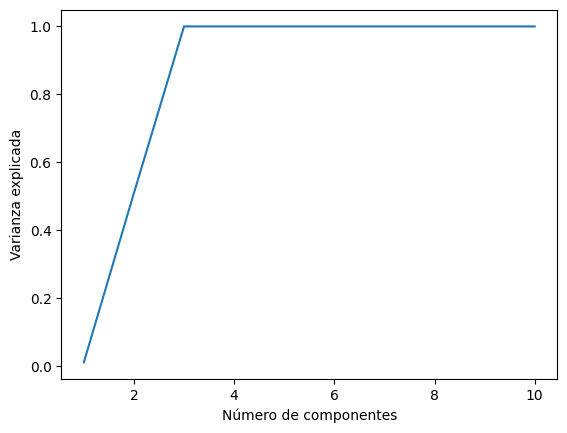

In [ ]:
import matplotlib.pyplot as plt
#Vamos a calcular la varianza por cada número de temas utilizando un rango de 1 a 10,
#pero antes hemos importado la biblioteca para crear la gráfica donde ver la varianza explicada y el número de componentes (después)

# Calculamos la varianza explicada por cada número de componentes
varianza_explicada = []
for i in range(1, 11):
    lsa = TruncatedSVD(n_components=i) #Utilizamos TruncatedSVD
    lsa_vectors = lsa.fit_transform(tdm)
    varianza_explicada.append(lsa.explained_variance_ratio_.sum())

# Gráfico de la varianza explicada vs número de componentes (En este momento dudé si podía estar mal ya que me da los mismos "3" que en clase)
plt.plot(range(1, 11), varianza_explicada)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.show() ##En este caso probe con otros textos y me daba un resultado distinto pero con estos era parecido al visto en clase

In [ ]:
# Utilizamos TruncatedSVD para realizar la reducción de dimensionalidad
lsa = TruncatedSVD(n_components=3) #Hemos visto que el número de temas óptimo es 3, por lo que le pasamos ese número.
lsa_vectors = lsa.fit_transform(tdm)

# Obtenemos las palabras con mayor peso en cada componente
terms = tfidf_vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_terms:
        print(t) #Aquí observo que en el primer tema encuentro palabras de los tres
        #textos relacionadas con 'libros', en el segundo con el texto de 1984; y el tercero con "autor"

Topic 1: 
('narnia', 0.21871448889769127)
('child', 0.15102316014970404)
('sell', 0.12567247704676002)
('novel', 0.11882733141732205)
('book', 0.11581552392817061)
('world', 0.10935724444884563)
('fantasy', 0.10323458112014715)
('orwell', 0.10190350782303914)
('publish', 0.09876538031760757)
('author', 0.07551158007485202)
Topic 2: 
('orwell', 0.19848220752868193)
('society', 0.13232147168578795)
('novel', 0.09057683700658949)
('1949', 0.06616073584289398)
('1949 secker', 0.06616073584289398)
('1949 secker warburg', 0.06616073584289398)
('1984', 0.06616073584289398)
('1984 dystopian', 0.06616073584289398)
('1984 dystopian novel', 0.06616073584289398)
('authoritarian', 0.06616073584289398)
Topic 3: 
('sell', 0.14822352288250373)
('100 million', 0.0741117614412521)
('100', 0.07411176144125194)
('100 million copy', 0.07411176144125192)
('1937', 0.07411176144125187)
('1937 wide', 0.07411176144125187)
('1937 wide critical', 0.07411176144125187)
('acclaim', 0.07411176144125187)
('acclaim nom

##Análisis latente probabilístico (PLSA)
En este momento queremos encontrar patrones ocultos o temas en un conjunto de datos, para ello deberemos analizar el contenido de un conjunto de elementos. Para ellos utilizaremos el algoritmo supervisado del PLSA.

In [ ]:
!pip install plsa #Instalamos una librería desarrollada específicamente para el análisis probabilístico latente

In [ ]:
from plsa import Corpus, Pipeline, Visualize #Aquí quería importar las librerías necesarias para el procesamiento de texto pero no pude a la primera.
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
import nltk
nltk.download('omw-1.4')




[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
pipeline = Pipeline(*DEFAULT_PIPELINE) #Creamos la instancia "pipeline" que tiene etapas de procesamiento de texto predefinidas.
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [ ]:
import nltk #Aquí me descargue las que me había dado error antes
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk #Aquí también me descargo la que me faltaba de forma individual ya que juntas no me dejaba (quería que el codigo estuviese limpio pero a veces es complicado)
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
corpus = Corpus(texts, pipeline) #Creamos una instancia de la clase "Corpus" a partir de los textos y el pipeline
corpus

Corpus:
Number of documents: 3
Number of words:     72

In [ ]:
n_topics = 2 #Especificamos el número de temas deseado (2). Aquí descubrí que el número de los documentos y de palabras debe ser superior a 3 (me daba ese erro si ponía otro número de temas)
plsa = PLSA(corpus, n_topics, True) #Creamos la instancia "PLSA" con el corpus, el número de temas y la bandera.
plsa

PLSA:
====
Number of topics:     2
Number of documents:  3
Number of words:      72
Number of iterations: 0

In [ ]:
result = plsa.fit() #Utilizamos el método fit para ajustar el modelo PLSA al corpus.
plsa

PLSA:
====
Number of topics:     2
Number of documents:  3
Number of words:      72
Number of iterations: 13

In [ ]:
result = plsa.best_of(5) #Utilizamos el método best_of para seleccionar la mejor configuración de resultados de los últimos 5 ajustes
result

PlsaResult:
Number of topics:    2
Number of documents: 3
Number of words:     72

In [ ]:
for i, topic in enumerate(result.word_given_topic): #Imprimimos los temas y palabras más probables de cada tema
   print("Topic "+str(i+1)+": ")
   for term in topic[:10]:
     print(term) #Observamos que 'narnia' y 'society' son las palabras más probables en sus respectivos temas.

Topic 1: 
('society', 0.047085101463395194)
('hobbit', 0.023542550731697597)
('warburg', 0.023542550731697597)
('orwell', 0.023542550731697597)
('lifetime', 0.023542550731697597)
('consequence', 0.023542550731697597)
('totalitarianism', 0.023542550731697597)
('mass', 0.023542550731697597)
('surveillance', 0.023542550731697597)
('regimentation', 0.023542550731697597)
Topic 2: 
('narnia', 0.13341772098212953)
('world', 0.0800506325892777)
('chronicle', 0.053367088392851814)
('series', 0.053367088392851814)
('history', 0.053367088392851814)
('battle', 0.026683544196425907)
('lewis', 0.026683544196425907)
('baynes', 0.026683544196425907)
('radio', 0.026683544196425907)
('television', 0.026683544196425907)


### Análisis Latente Dirichlet (LDA)

Sin embargo, si queremos utilizar el que se considera una mejora del probabilístico debemos utilizar la Asignación de Dirichlet Latente (LDA).

Es un red bayesiana (representa un conjunto de variables y sus relaciones pribabilísticas a través de un grafo sobre el que se pueden hacer inferencias).

Nuestro objetivo es descubrir temas en nuestro dataset.

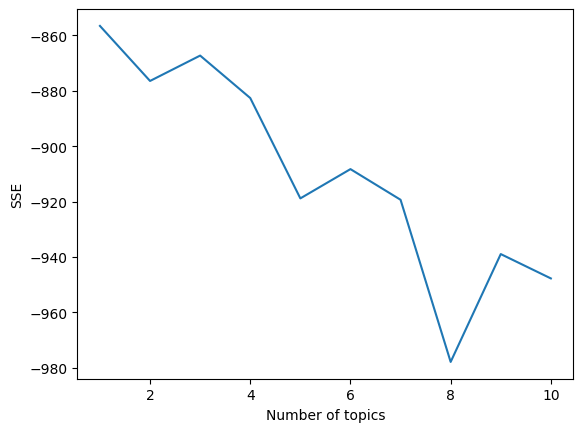

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation #Utilizamos la librería sklearn para el anális y la clase LatentDirichletAllocation para ajustar el modelo LDA.
from sklearn.feature_extraction.text import CountVectorizer #Utilizamos la clase CountVectorizer para crear una matriz de términos-documentos y para obtener los nombres de las características.

# Creamos una matriz de términos-documentos
cv = CountVectorizer(stop_words="english")
X = cv.fit_transform(texts_lem)

# Ajustamos varios modelos de LDA con diferentes números de temas
n_topics = range(1, 11)
sse = []
for n in n_topics:
  lda = LatentDirichletAllocation(n_components=n)
  lda.fit(X)
  sse.append(lda.score(X)) ##Buscamos obtener la suma de las desviaciones cuadráticas

# Graficamos el número de desviaciones cuadráticas (SSE) versus el número de temas
plt.plot(n_topics, sse)
plt.xlabel('Number of topics')
plt.ylabel('SSE')
plt.show()   #Buscamos, mediante el Método del Codo, saber el punto en el que la curva refleja como la disminución de SEE comienza a
##disminuir significativamente. En este caso en el número de temas = 7, llegando a 980 desviaciones cuadráticas

In [ ]:
# Realizamos el topic modeling con LDA
lda = LatentDirichletAllocation(n_components=7) #He elegido finalmente 7 temas porque considero que es el punto claro donde la disminución en SEE comienza a hacerlo de forma significativa.
lda.fit(X) # "X " representa lo que ha transformado el vectorizador de los textos lematizados

LatentDirichletAllocation(n_components=7)

In [ ]:
# Obtenemos los temas y las palabras más probables de cada tema
topics = lda.components_
feature_names = cv.get_feature_names_out()
for topic_idx, topic in enumerate(topics):
    print("Topic {}:".format(topic_idx + 1))
    terms = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    for i, term in enumerate(terms):
        print(term, topic[i]) #Obviamente que hay ciertos temas que me esperaba como 'narnia' o 'fantasy',
        #pero he de decir que 'manipulate' me ha llamado la atención (imagino que habla de 1984 por el tema político) y he descubierto que 'pauline' hace referencia a la ilustradora de Narnia.

Topic 1:
publish 0.1428571903718428
book 0.1428571903718428
novel 0.14285718443492418
english 0.14285718184879076
author 0.14285718184879076
role 0.14285718443492418
fantasy 0.1428571903718428
child 0.14285718184879076
medal 0.14285718184879076
literature 0.14285718184879076
Topic 2:
book 1.1428569312630463
child 1.1428569312630463
sell 0.14285715709920585
author 0.14285715624717446
english 0.14285715624717446
herald 0.14285715709920585
prize 1.1428569312630463
nominate 0.14285715624717446
new 0.14285715624717446
million 0.14285715624717446
Topic 3:
publish 0.1428571903718428
book 0.1428571903718428
novel 0.14285718443492418
english 0.14285718184879076
author 0.14285718184879076
role 0.14285718443492418
fantasy 0.1428571903718428
child 0.14285718184879076
medal 0.14285718184879076
literature 0.14285718184879076
Topic 4:
novel 0.14285715478841135
orwell 0.14285715478841135
publish 1.1428569539228057
society 0.1428571526393329
role 0.1428571526393329
dystopian 1.1428569539228057
model 0.

##Conclusiones
- Gracias a la extracción de términos y modelado de temas he conseguido mi propósito de identificar las palabras más representativas de los textos, siendo a veces las menos frecuentes en la mayoría de los textos, pero las más importantes (algo realmente útil). Para ello, he utilizado bibliotecas como sklearn, spacy, nltk. He tokenizado, clasificado en categorías gramaticales y aplicado patrones morfosintácticos y listas de exclusión (stopwords) y procesado el texto, además de crear lista de palabras lematizadas.
- He medido la relación estadística entre términos y calculado y analizado la importancia de estos en el conjunto de documentos (qué n-gramas estaban más relacionados con el tema que otros n-gramas).
- He utilizado diversas clases importadas de las librerías mencionadas con las que poder llevar a cabo la vectorización, crear matrices de documentos y representar los términos con mayor peso.
- He aprendido a determinar el número apropiado de temas mediante el Método del Codo y las desviaciones cuadráticas.
- He de decir que, me ha sorprendido las aplicaciones y posibilidades de la extracción de información y clasificación de textos y lo utilizaré en mi TFM donde podré poner en práctica mucho más que las palabras más representativas o su relación procedentes de tres textos de Wikipedia. Topics ocultos, información no encontrada o investigada todavía a la que se puede llegar con porcentajes y cálculo de relación de palabras, al fin y al cabo, recuperación de información con posibles proyectos de gran alcance.




<div>
<img src="https://prodimage.images-bn.com/pimages/9780345445605_p0_v1_s1200x630.jpg" style="width: 30%; display: inline-block;" alt="My treasure">
<img src="https://pictures.abebooks.com/isbn/9780064433990-es.jpg" style="width: 30%; display: inline-block;" alt="Narnia">
<img src="https://m.media-amazon.com/images/I/71sOSrd+JxL._AC_UF1000,1000_QL80_.jpg" style="width: 30%; display: inline-block;" alt="1984">
</div>